# Mid-semester assignment Part 2 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Stav Elizur
<br>
Student 2: Tommy Afek


## Fashion MNIST with Keras
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://cloudxlab.com/blog/wp-content/uploads/2019/06/Tensorflow_Keras.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

# Neural Network with Tensorflow Keras part 1 (Binary Classification)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

!gdown --id 1KXw1jNlrhNJp4jh2UT9zH7YsHv529xHw
!unzip /content/Explainer_part_2.zip

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KXw1jNlrhNJp4jh2UT9zH7YsHv529xHw
To: /content/Explainer_part_2.zip
100% 341/341 [00:00<00:00, 734kB/s]
Archive:  /content/Explainer_part_2.zip
  inflating: Explainer_part_2.md     


## Load Dataset

In [ ]:
def load_dataset():
  return keras.datasets.fashion_mnist.load_data()

In [ ]:
%%script echo skipping
(X_train, y_train), (X_test, y_test) = load_dataset()
plt.imshow(X_train[1])
plt.show()

skipping


## Data preprocessing

### Feature scaling

In [ ]:
%%script echo skipping
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = sc.transform(X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

skipping


### Select two classes

In [ ]:
%%script echo skipping
import numpy as np

dress_num = 3
ankle_boot_num = 9

index_train = np.where((y_train == ankle_boot_num) | (y_train == dress_num))
index_test = np.where((y_test == ankle_boot_num) | (y_test == dress_num))

X_train = X_train[index_train[0],:]
y_train = y_train[index_train[0]]
X_test = X_test[index_test[0],:]
y_test = y_test[index_test[0]]

y_train[y_train == dress_num] = 0
y_test[y_test == dress_num] = 0
y_train[y_train == ankle_boot_num] = 1
y_test[y_test == ankle_boot_num] = 1

skipping



We need to convert 1-dimensional class arrays to multi-dimensional class matrices<br>


`np_utils.to_categorical` is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector.<br>
Read about np_utils here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
from keras.utils import np_utils

### Build the network layers
Read about Fully connected layers in keras here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:
%%script echo skipping
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(tf.keras.layers.Dense(units=12, activation='sigmoid', input_shape=[784]))
print(model.output_shape)
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
print(model.output_shape)

skipping


### Build the Optimizer
Read about the Optimizer here: https://keras.io/api/optimizers/

In [ ]:
%%script echo skipping
from keras.optimizers import Adam

opt = Adam()
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

skipping


### Training
Use the fit method to train your model, then store the results within the variable "history".


In [ ]:
%%script echo skipping
history = model.fit(x= X_train,y=y_train, validation_split = 0.1, batch_size = 32, epochs = 10)

skipping


### Save Trained model (weights)
Read about Save and load models in tensorflow.keras here: [https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)


In [ ]:
%%script echo skipping
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Google Colab/model')

skipping


### Loss and Accuracy Visualization
Show  on plot the lose during training

In [ ]:
import matplotlib.pyplot as plt

def training_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
%%script echo skipping
training_loss(history)

skipping


Show  on plot the accuracy during training

In [ ]:
from matplotlib import pyplot as plt

def training_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
%%script echo skipping
training_accuracy(history)

skipping


### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
%%script echo skipping
def predict_binary(X_test):
  y_pred = model.predict(X_test)
  y_pred = (y_pred > 0.5)
  return y_pred

skipping


In [ ]:
from sklearn.metrics import accuracy_score

def print_accuracy_score(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {round(accuracy*100)}%')

In [ ]:
%%script echo skipping
print_accuracy_score(y_test, predict_binary(X_test))

skipping


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

def print_confusion_matrix(y_test,y_pred, display_labels):
  cm = confusion_matrix(y_test, y_pred)
  print(f'Confusion Matrix:\n\n{cm}')
  cmd = ConfusionMatrixDisplay(cm, display_labels=display_labels)
  cmd.plot()

In [ ]:
%%script echo skipping
print_confusion_matrix(y_test, predict_binary(X_test), ['Dress','Ankle Boot'])

skipping


In [ ]:
from sklearn.metrics import classification_report

def print_classification_report(y_test, y_pred, target_names):
  print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
%%script echo skipping
print_classification_report(y_test, predict_binary(X_test), ['Dress','Ankle Boot'])

skipping


---
<br>


# Neural Network with Tensorflow Keras part 2 (Multiclass Classification)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Load Dataset

4422102/4422102 [==============================] - 0s 0us/step


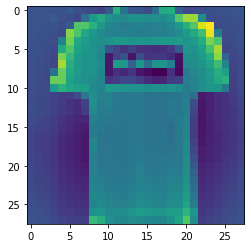

In [ ]:
from sklearn.preprocessing import StandardScaler

def load_dataset_for_multiclass():
  (X_train, y_train), (X_test, y_test) = load_dataset()
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
  X_test = sc.transform(X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
  y_train = np_utils.to_categorical(y_train)

  return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = load_dataset_for_multiclass()
plt.imshow(X_train[1].reshape(28, 28))
plt.show()

### The rest you will have to create yourself...

## Models

### Base Model

In [ ]:
%%script echo skipping
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense

y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
model = Sequential()
model.add(tf.keras.layers.Dense(units=12, activation='sigmoid', input_shape=[784]))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
history = model.fit(x = X_train ,y = y_train, validation_split = 0.5, batch_size = 32, epochs = 10)

training_accuracy(history)
training_loss(history)

predictions = np.array([])
y_pred = model.predict(X_test)
for y in y_pred:
  predictions = np.concatenate([predictions, [np.argmax(y)]])

print_confusion_matrix(y_test, predictions, y_labels)
print_classification_report(y_test, predictions, y_labels)
print_accuracy_score(y_test, predictions)

skipping


### Experiment number 1

In [ ]:
%%script echo skipping
import numpy as np
def first_experiment(fully_connected_layers_list,
                     neurons_in_layer_list):
  (X_train, y_train), (X_test, y_test) = load_dataset_for_multiclass()
  y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  index_experiment = 1
  for fully_connected_layer in fully_connected_layers_list:
    for neuron_in_layer in neurons_in_layer_list:
        model = tf.keras.models.Sequential()

        units = neuron_in_layer
        model.add(tf.keras.layers.Dense(units=12, activation='sigmoid', input_shape=[784]))
        for fully_con_layer in range(fully_connected_layer):
          model.add(tf.keras.layers.Dense(units=units, activation='sigmoid'))
          units = units // 2

        model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
        model.summary()
        model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
        history = model.fit(x = X_train ,y = y_train, validation_split = 0.1, batch_size = 32, epochs = 10)

        training_accuracy(history)
        training_loss(history)

        predictions = np.array([])
        y_pred = model.predict(X_test)
        for y in y_pred:
          predictions = np.concatenate([predictions, [np.argmax(y)]])

        print_confusion_matrix(y_test, predictions, y_labels)
        print_classification_report(y_test, predictions, y_labels)
        print_accuracy_score(y_test, predictions)

        model.save(f'/content/drive/MyDrive/Google Colab/Exp1_ann/model_exp_1_ann{index_experiment}')
        index_experiment += 1

first_experiment([3, 2],
                [120, 300])

skipping


### Experiment number 2

In [ ]:
%%script echo skipping
import numpy as np
def second_experiment(learning_rates,
                      batch_sizes,
                      numbers_of_epochs):
  (X_train, y_train), (X_test, y_test) = load_dataset_for_multiclass()
  y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  index_experiment = 1

  for learning_rate in learning_rates:
    for batch_size in batch_sizes:
      for numbers_of_epoch in numbers_of_epochs:

        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(units=12, activation='sigmoid', input_shape=[784]))
        model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
        model.summary()

        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        history = model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = batch_size, epochs = numbers_of_epoch)

        training_accuracy(history)
        training_loss(history)

        predictions = np.array([])
        y_pred = model.predict(X_test)
        for y in y_pred:
          predictions = np.concatenate([predictions, [np.argmax(y)]])

        print_confusion_matrix(y_test, predictions, y_labels)
        print_classification_report(y_test, predictions, y_labels)
        print_accuracy_score(y_test, predictions)


        model.save(f'/content/drive/MyDrive/Google Colab/Exp2_ann/model_exp_2_ann{index_experiment}')
        index_experiment += 1

second_experiment([0.001, 0.01, 0.1],
                  [40, 60, 70],
                  [5, 6, 10])

skipping


## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### Load trained model

In [ ]:
!pip install -U --no-cache-dir gdown --pre
!gdown --id 18h35T33aNKe4_U8lWHAU4SgPL7EoKzGK
!unzip /content/model_ann.zip

model = tf.keras.models.load_model('/content/model_ann')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18h35T33aNKe4_U8lWHAU4SgPL7EoKzGK
To: /content/model_ann.zip
100% 1.26M/1.26M [00:00<00:00, 185MB/s]
Archive:  /content/model_ann.zip
   creating: model_ann/assets/
  inflating: model_ann/keras_metadata.pb  
  inflating: model_ann/saved_model.pb  
  inflating: model_ann/variables/variables.index  
  inflating: model_ann/variables/variables.data-00000-of-00001  


### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single image of an item of clothing (28x28 image).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before) and prints a prediction.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from numpy import load as load_npy
from google.colab import files
test_images = files.upload()

Saving shirt (1).jpeg to shirt (1).jpeg


In [ ]:
from PIL import Image
import numpy as np
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for imageName in test_images.keys():
  test_image = np.array(Image.open(imageName).resize((28, 28)))
  result = model.predict(test_image.reshape(1, 784))
  print(f'Name of class: {class_names[np.argmax(result[0].round(), axis=-1)]}')
  print(class_names)

1/1 [==============================] - 3s 3s/step
Name of class: T-shirt/top
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
